In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Reading Data sets of loan

In [2]:
train=pd.read_csv(r'C:\Users\sreejayan\Desktop\virtual competition\train_ctrUa4K.csv')

In [3]:
test=pd.read_csv(r'C:\Users\sreejayan\Desktop\virtual competition\test_lAUu6dG.csv')

In [4]:
sample=pd.read_csv(r'C:\Users\sreejayan\Desktop\virtual competition\sample_submission_49d68Cx.csv')

In [5]:
train_original=train.copy()
test_original=test.copy()

display train data set

In [6]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


test data set display

In [7]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [10]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [11]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [14]:
train.shape

(614, 13)

In [15]:
test.shape

(367, 12)

In [16]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

print proportions

In [17]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Exploratory analysis 

<Axes: >

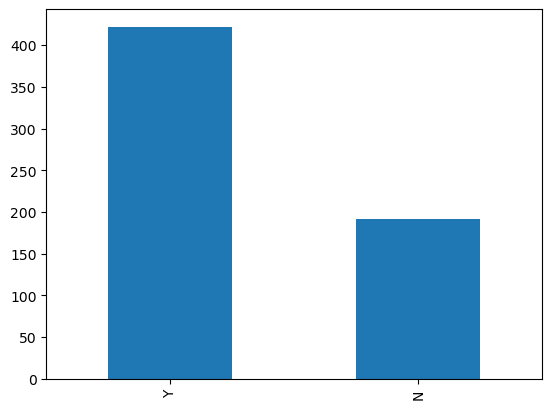

In [19]:
train['Loan_Status'].value_counts().plot.bar()

indipendent variable (categorical)

<Axes: title={'center': 'Credit_History'}>

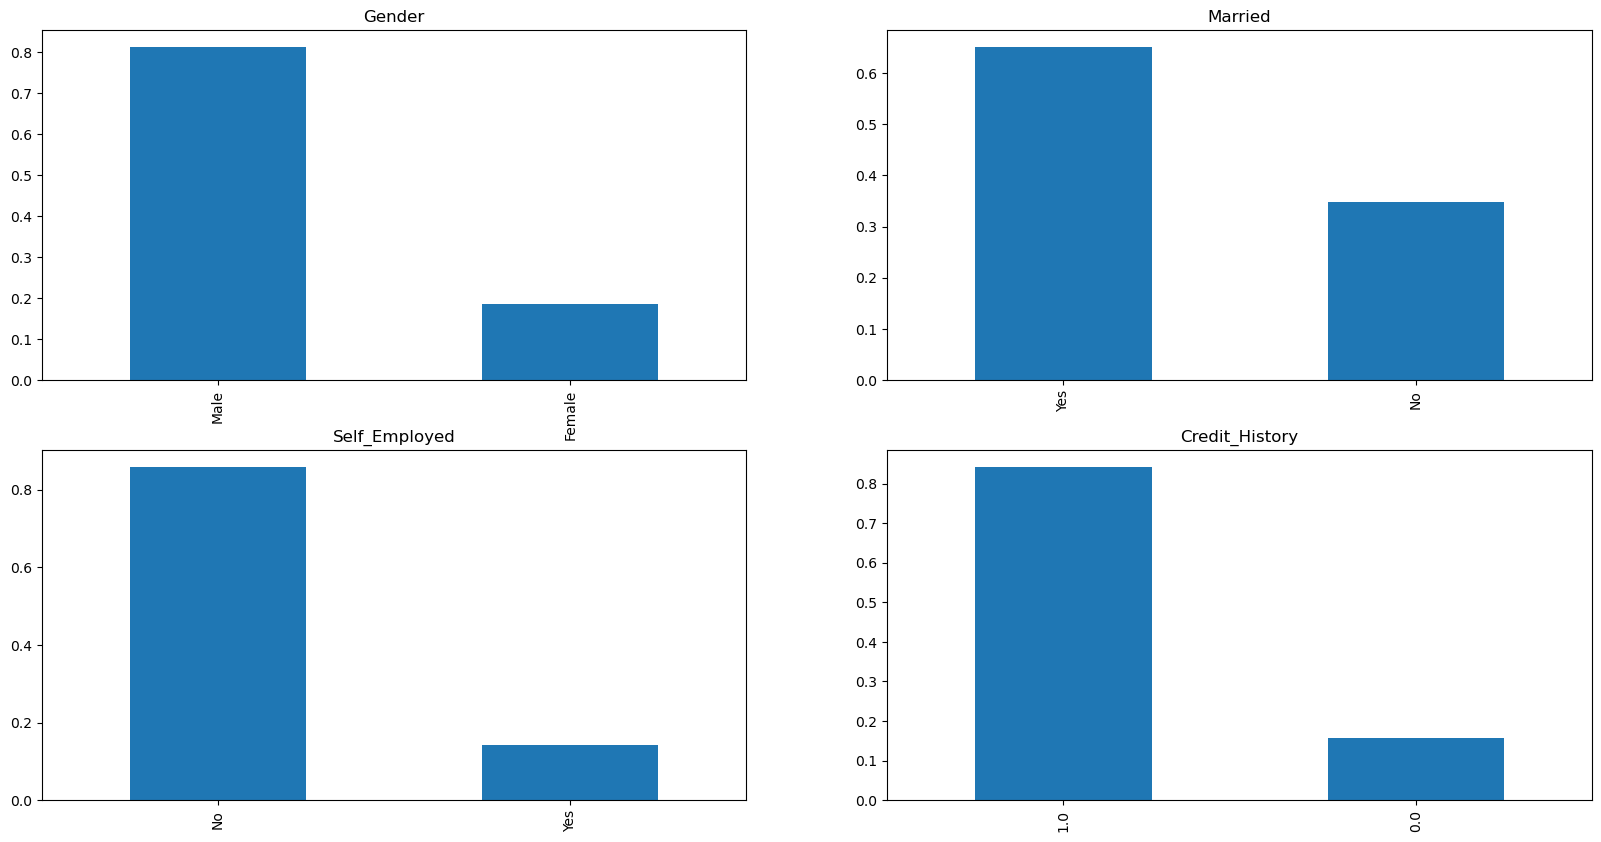

In [20]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')


indipendent variable (ordinal)

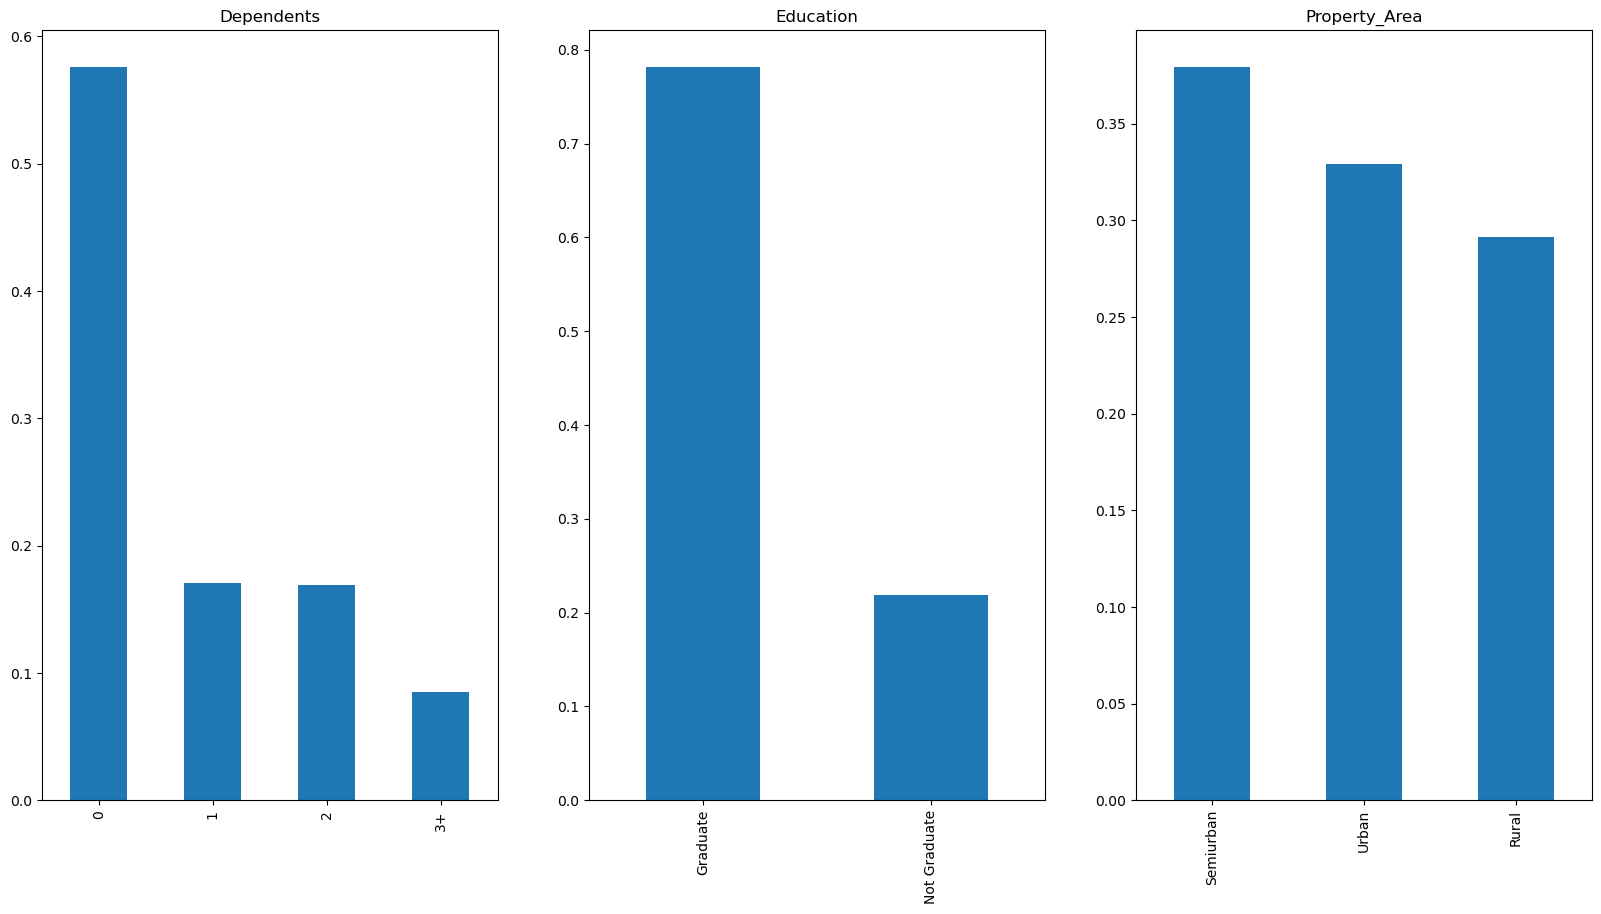

In [21]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()


numerical

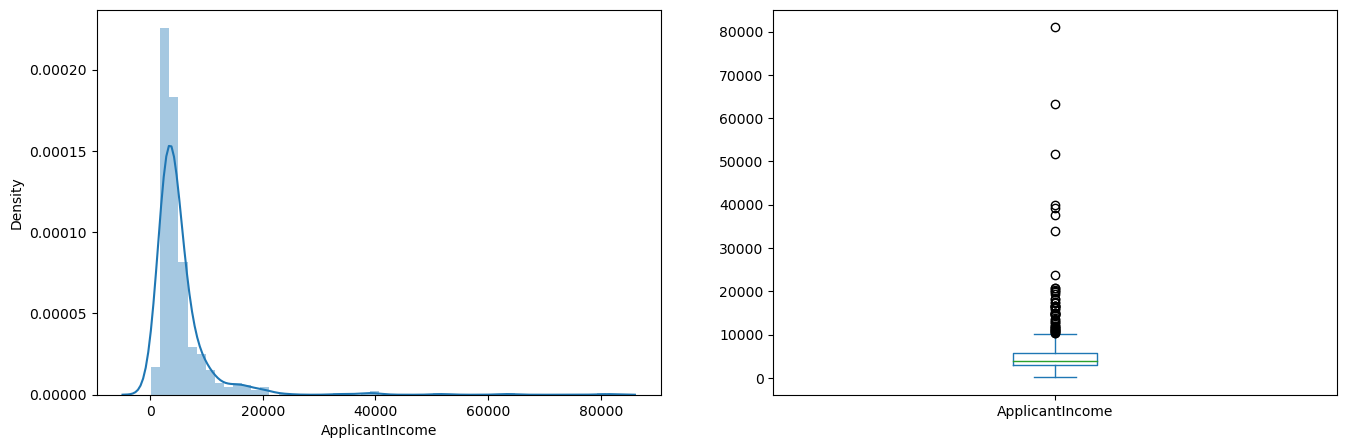

In [22]:
plt.figure(1)
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)    
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()


Text(0.5, 0.98, '')

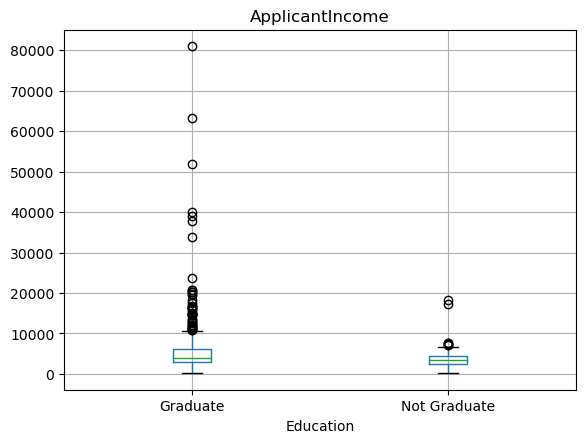

In [23]:
train.boxplot(column='ApplicantIncome', by ='Education')
plt.suptitle("") 


In [24]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
#co applicant income

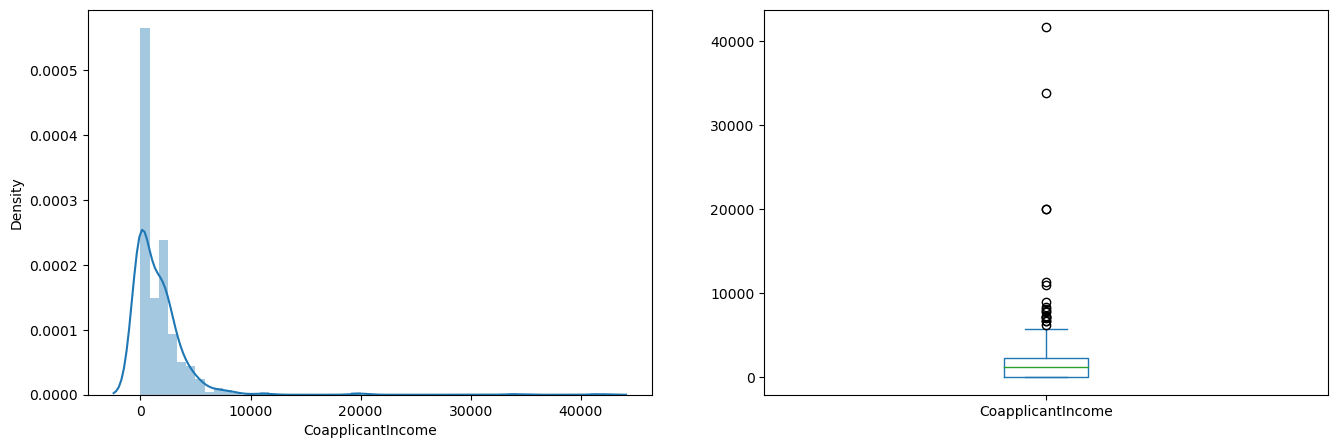

In [26]:
plt.figure(1)
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)    
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

loan amount variable

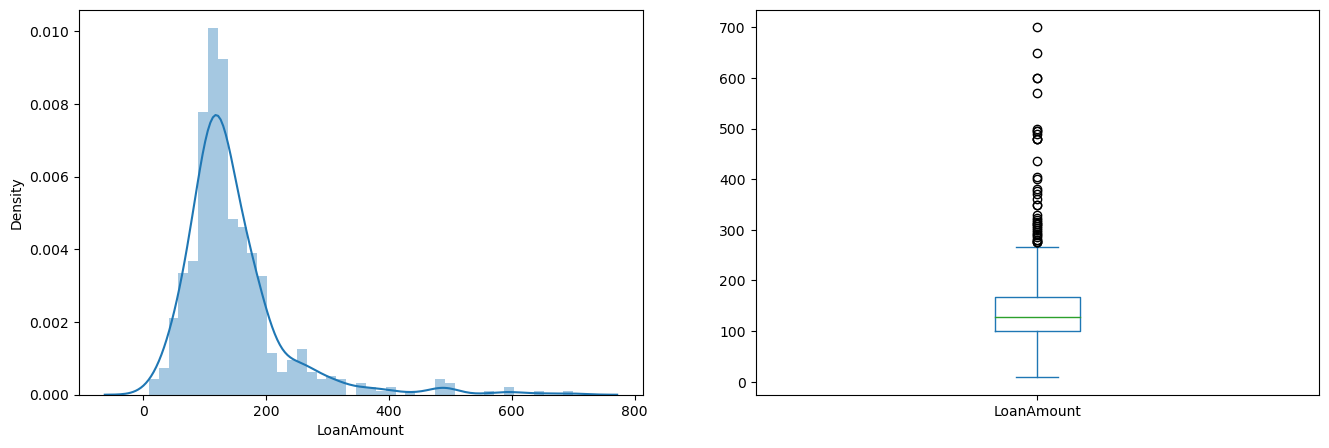

In [27]:
plt.figure(1)
plt.subplot(121) 
df=train.dropna()
sns.distplot(train['LoanAmount']);
plt.subplot(122)    
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

bivariate 

categorical vs target variable

<Axes: xlabel='Gender'>

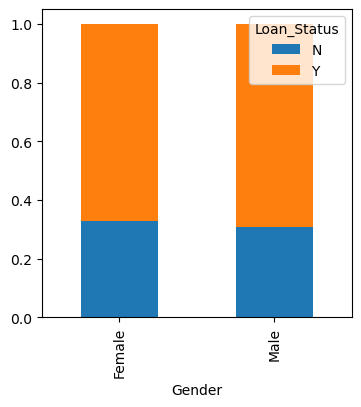

In [28]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",
stacked=True,figsize=(4,4))


<Axes: xlabel='Loan_Status'>

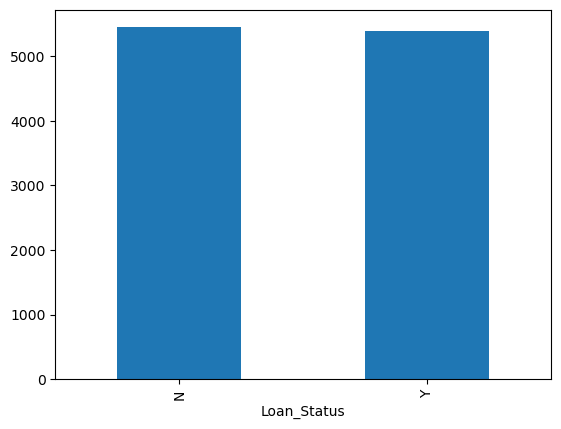

In [29]:
# loan vs aplicant income
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

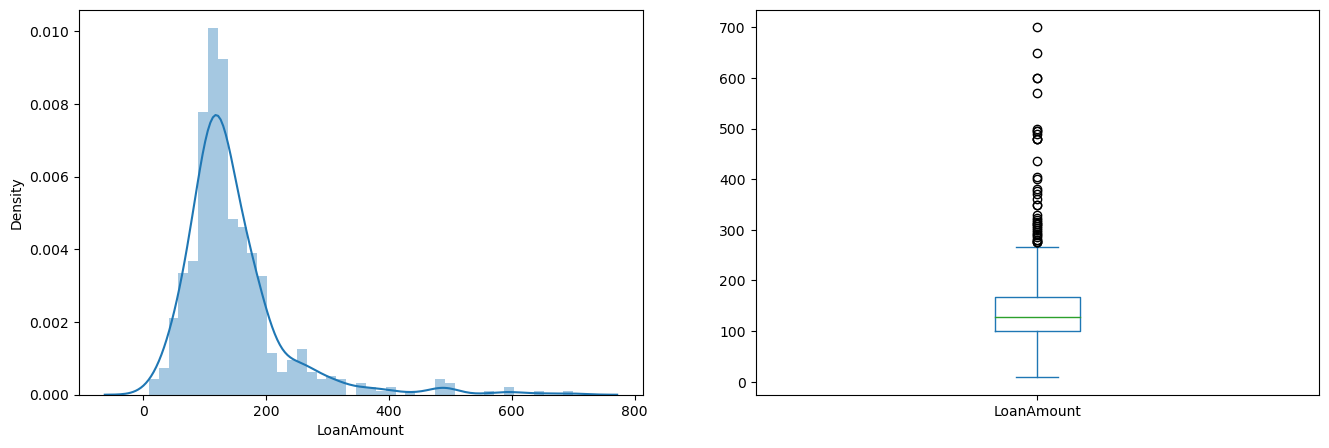

In [30]:
plt.figure(1)
plt.subplot(121) 
df=train.dropna()
sns.distplot(train['LoanAmount']);

plt.subplot(122)    
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

Finding the null values in the training dataset

In [31]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [33]:
train.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

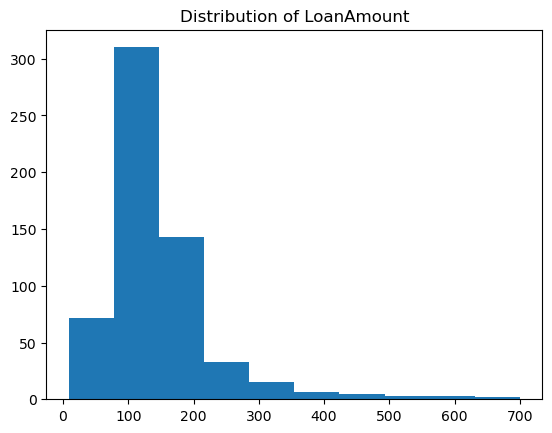

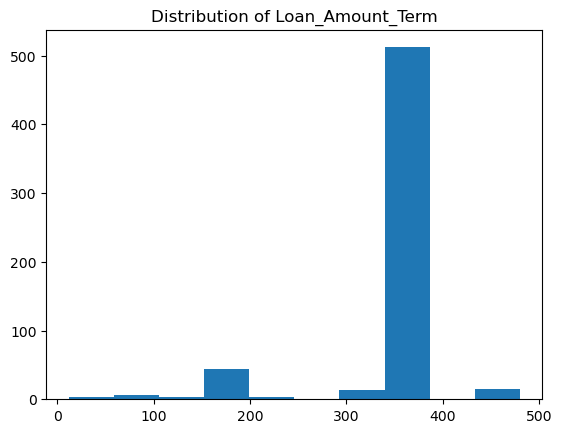

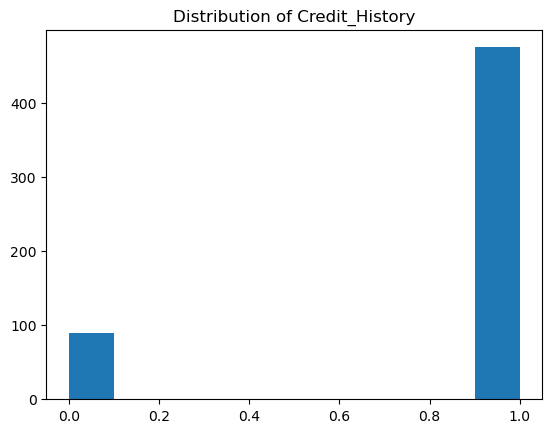

In [34]:
#Displaying the distribution of float-datatype columns that contain null values in the training dataset
for i in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    plt.hist(train[i])
    plt.title('Distribution of {}'.format(i))
    plt.show()

Filling the null values of the string columns of the training dataset by  mode

In [35]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [36]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Filling  the null values of the training dataset by mode and median

In [38]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [39]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [40]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [41]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Finding outliers in the numerical columns of the training dataset using boxplot graph

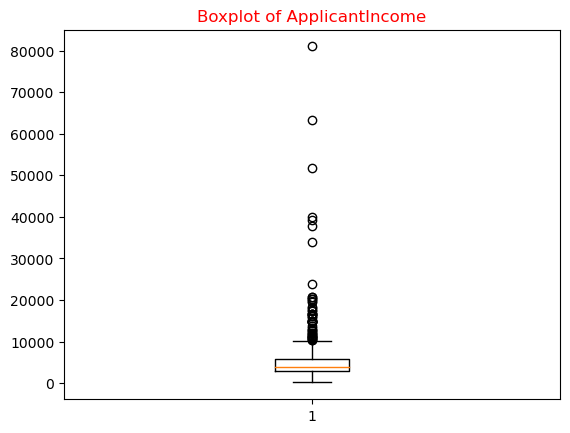

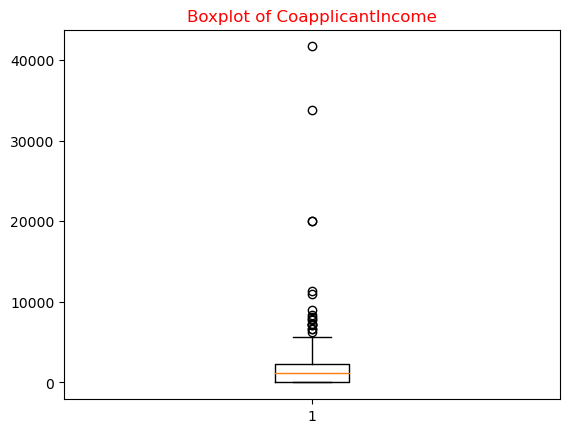

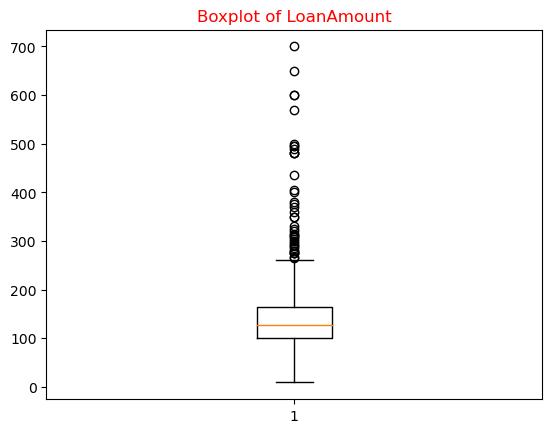

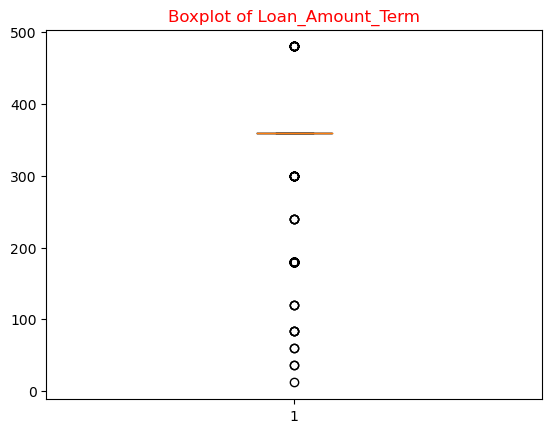

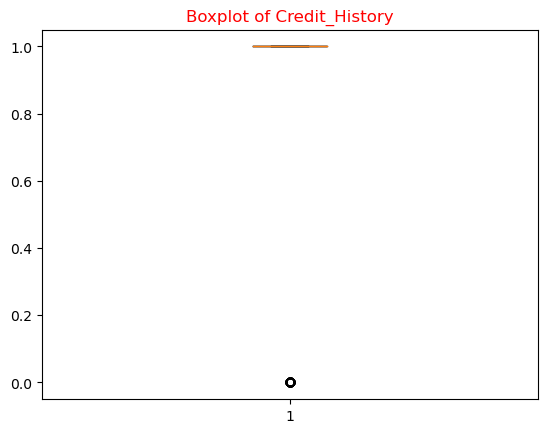

In [42]:
num_col = train.select_dtypes(include = ['float', 'int'])
for col in num_col:
    plt.figure()
    plt.boxplot(train[col])
    plt.title('Boxplot of {}'.format(col), color = 'r')
    plt.show()

In [43]:
#Finding the number of outliers in each numerical columns of training dataset
for col in num_col:
    Q1 =train[col].quantile(0.25)
    Q3 =train[col].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - (1.5 * IQR)
    upp = Q3 + (1.5 * IQR)
    outliers = []
    for x in train[col]:
        if(x > upp) or (x < low):
            outliers.append(x)
    print('The outliers in the column', col, ' is', len(outliers))

The outliers in the column ApplicantIncome  is 50
The outliers in the column CoapplicantIncome  is 18
The outliers in the column LoanAmount  is 41
The outliers in the column Loan_Amount_Term  is 88
The outliers in the column Credit_History  is 89


In [44]:
train.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

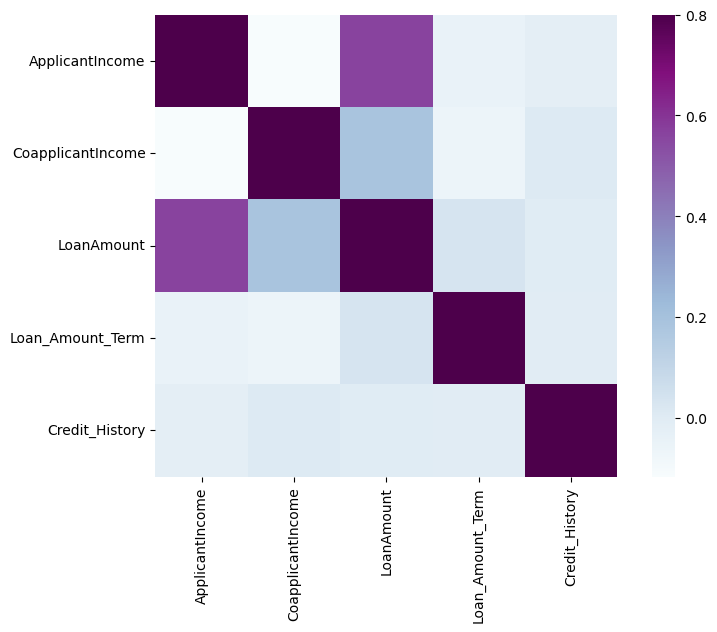

In [45]:
matrix=train.corr()
f, ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu");

# Pre-processing of testing dataset

In [46]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [47]:
test.shape

(367, 12)

Getting the info of the testing dataset

In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


Finding the null values in the testing dataset

In [49]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Displaying the distribution of float-datatype columns that contain null values in the testing dataset

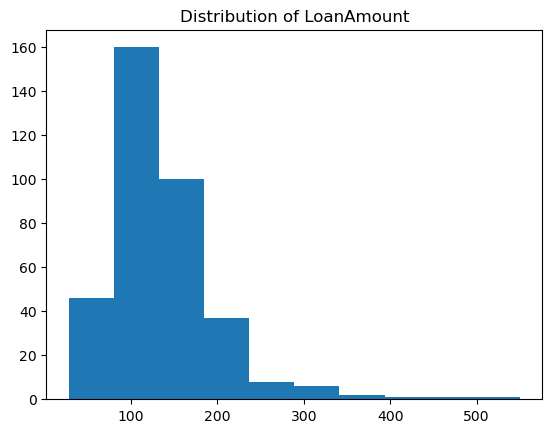

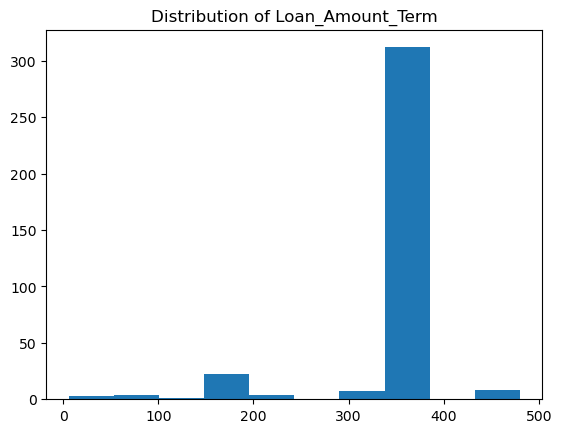

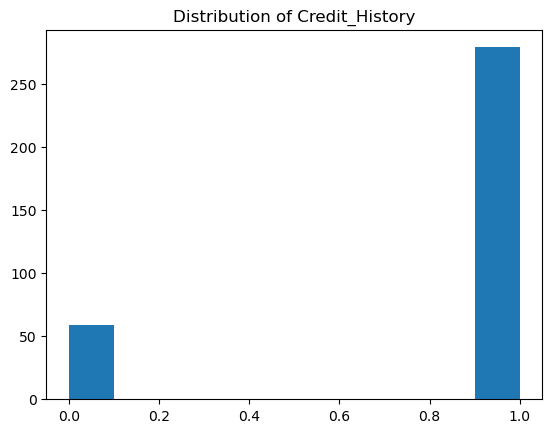

In [50]:
for i in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    plt.hist(test[i])
    plt.title('Distribution of {}'.format(i))
    plt.show()

Filling the null values of the testing dataset by their respective mode and medians

In [51]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

In [52]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Finding the number of outliers in each numerical columns of testing dataset

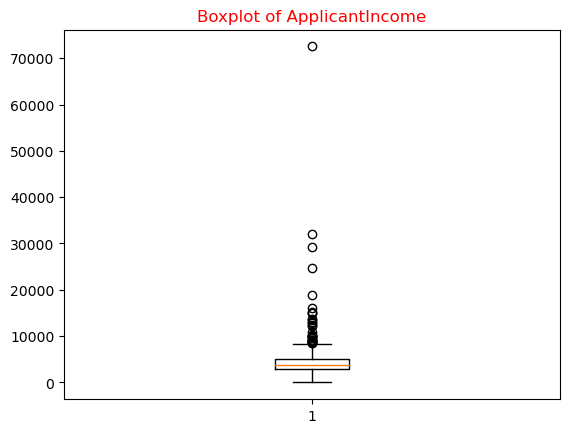

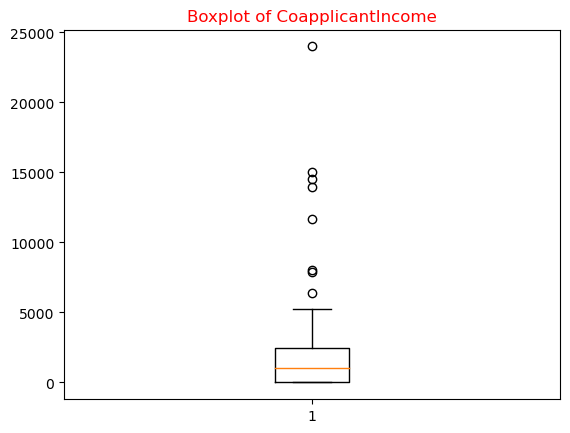

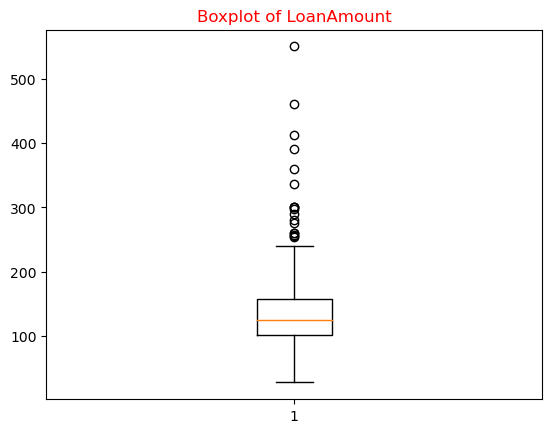

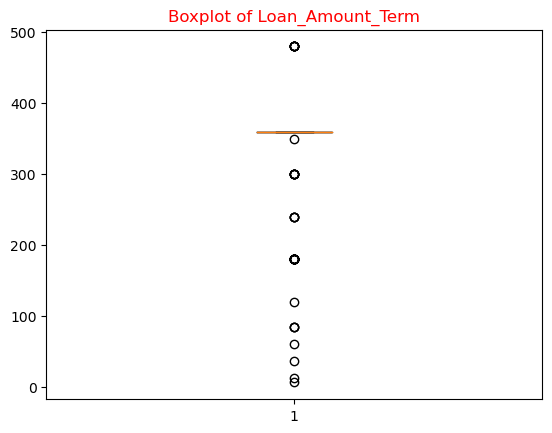

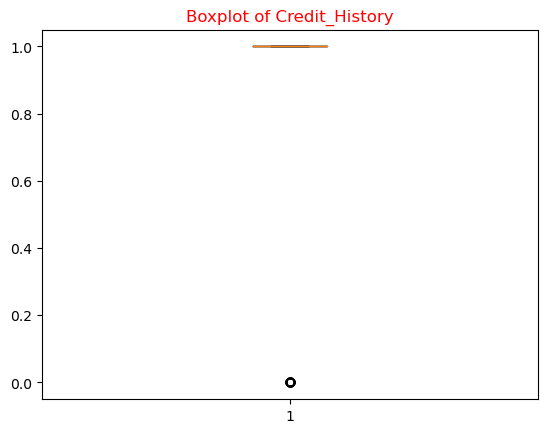

In [53]:
for col in num_col:
    plt.figure()
    plt.boxplot(test[col])
    plt.title('Boxplot of {}'.format(col), color = 'r')
    plt.show()

In [54]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,135.980926,342.822888,0.839237
std,4910.685399,2334.232099,60.959739,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


Finding the number of outliers in each numerical columns of testing dataset

In [55]:
for col in num_col:
    Q1 = test[col].quantile(0.25)
    Q3 = test[col].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - (1.5 * IQR)
    upp = Q3 + (1.5 * IQR)
    outliers = []
    for x in test[col]:
        if(x > upp) or (x < low):
            outliers.append(x)
    print('The outliers in the column', col, ' is', len(outliers))

The outliers in the column ApplicantIncome  is 32
The outliers in the column CoapplicantIncome  is 8
The outliers in the column LoanAmount  is 18
The outliers in the column Loan_Amount_Term  is 50
The outliers in the column Credit_History  is 59


Getting the number of unique values in the column 'Loan_ID' of training dataset

In [56]:
train['Loan_ID'].nunique()

614

Getting the number of unique values in the column 'Loan_ID' of testing dataset

In [57]:
test['Loan_ID'].nunique()

367

Setting the feature training and testing variables, and target training variable

In [58]:
x_train = train.drop(['Loan_Status', 'Loan_ID'], axis = 1)
x_test = test.drop('Loan_ID', axis = 1)
y_train = train['Loan_Status']

# One Hot Encode

One hot encoding x_train

In [59]:
x_train = pd.get_dummies(x_train)
x_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


One hot encoding x_test

In [60]:
x_test = pd.get_dummies(x_test)
x_test.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

Loading the head of the sample dataset

In [62]:
sample.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [63]:
sample_copy = sample.copy()

# Importing RandomizedSearchCV from sklearn

In [64]:
from sklearn.model_selection import RandomizedSearchCV

Creating parameters for tuning

In [65]:
penalty = ['l1', 'l2', 'elasticnet', None]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
multi_class = ['auto', 'ovr', 'multinomial']

In [66]:
lr_random_grid = {'penalty' : penalty,
                 'solver' : solver,
                 'multi_class': multi_class}

In [67]:
logic = LogisticRegression()

Tuning with Randomized Search CV for logistic regression

In [68]:
lr_randomcv = RandomizedSearchCV(estimator = logic, param_distributions = lr_random_grid, n_iter = 100, cv =3, verbose = 2, n_jobs = 1)
lr_randomcv.fit(x_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END .........multi_class=auto, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........multi_class=auto, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........multi_class=auto, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....multi_class=auto, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....multi_class=auto, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....multi_class=auto, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....multi_class=auto, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....multi_class=auto, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....multi_class=auto, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END multi_class=auto, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END multi_class=auto, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END multi_class=auto, penalty=l1, solver

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=100, n_jobs=1,
                   param_distributions={'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   verbose=2)

Displaying best estimator for logistic regression

In [69]:
lr_randomcv.best_estimator_

LogisticRegression(penalty='l1', solver='liblinear')

Predicting with best estimator of logistic regression

In [70]:
lr_best_random = lr_randomcv.best_estimator_
y_best_pred_lr = lr_best_random.predict(x_test)

Replacing the 'Loan_Status' column with the prediction values from logistic regression after tuning

In [71]:
sample['Loan_Status'] = y_best_pred_lr

Saving the logistic regression prediction model dataset after tuning as a csv file

In [72]:
sample.to_csv(r"C:\Users\sreejayan\Desktop\vitual code\logistic_regression_model3.csv", index = False)

Your score for this submission is : 0.7847222222222222.

k Nearest Neighbors

In [73]:
from sklearn.neighbors import KNeighborsClassifier

Creating parameters for tuning

In [74]:
n_neighbors = np.arange(3,15)
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [int(i) for i in np.linspace(start = 10, stop = 100, num = 10)]
metric = ['minkowski', 'euclidean', 'manhattan', 'haversine']
p = [1,2]

In [75]:
knn_random_grid = {'n_neighbors' : n_neighbors,
                  'algorithm' : algorithm,
                  'leaf_size' : leaf_size,
                  'metric' : metric,
                  'p' : p}

In [76]:
knn = KNeighborsClassifier()

In [77]:
knn_randomcv = RandomizedSearchCV(estimator = knn, param_distributions = knn_random_grid, n_iter = 100, cv =3, verbose = 2, n_jobs = 1)
knn_randomcv.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END algorithm=ball_tree, leaf_size=80, metric=minkowski, n_neighbors=3, p=2; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=80, metric=minkowski, n_neighbors=3, p=2; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=80, metric=minkowski, n_neighbors=3, p=2; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=9, p=2; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=9, p=2; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=9, p=2; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=30, metric=haversine, n_neighbors=4, p=1; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=30, metric=haversine, n_neighbors=4, p=1; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=30, metric=haversine, n_neighbors=4, p=1; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_s

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100, n_jobs=1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'metric': ['minkowski', 'euclidean',
                                                   'manhattan', 'haversine'],
                                        'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'p': [1, 2]},
                   verbose=2)

Displaying best estimator randomcv for knn

In [78]:
knn_randomcv.best_estimator_

KNeighborsClassifier(algorithm='brute', leaf_size=10, metric='manhattan',
                     n_neighbors=13, p=1)

In [79]:
knn_best_random = knn_randomcv.best_estimator_

Importing GridSearchCV from sklearn

In [80]:
from sklearn.model_selection import GridSearchCV

Creating parameter for GirdSearchCV

In [81]:
param_grid_knn = {'n_neighbors' : [knn_randomcv.best_params_['n_neighbors']-3,
                              knn_randomcv.best_params_['n_neighbors']-2,
                              knn_randomcv.best_params_['n_neighbors']-1,
                              knn_randomcv.best_params_['n_neighbors']],
              'algorithm' : [knn_randomcv.best_params_['algorithm']],
              'leaf_size' : [knn_randomcv.best_params_['leaf_size'],
                            knn_randomcv.best_params_['leaf_size']+10],
              'metric' : [knn_randomcv.best_params_['metric']],
              'p' : [knn_randomcv.best_params_['p']]    
}

In [82]:
grid_search_knn = GridSearchCV(estimator = knn, param_grid = param_grid_knn, cv = 10, n_jobs = 1, verbose =2)
grid_search_knn.fit(x_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=10, p=1; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=10, p=1; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=10, p=1; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=10, p=1; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=10, p=1; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=10, p=1; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=10, p=1; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=10, p=1; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=10, p=1; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=manhattan,

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'algorithm': ['brute'], 'leaf_size': [10, 20],
                         'metric': ['manhattan'],
                         'n_neighbors': [10, 11, 12, 13], 'p': [1]},
             verbose=2)

Displaying best estimator gridcv for knn

In [83]:
grid_search_knn.best_estimator_

KNeighborsClassifier(algorithm='brute', leaf_size=10, metric='manhattan',
                     n_neighbors=11, p=1)

Predicting with best estimator of knn

In [84]:
best_grid_knn = grid_search_knn.best_estimator_
y_best_pred_knn = best_grid_knn.predict(x_test)

Replacing the 'Loan_Status' column with the prediction values from knn

In [85]:
sample['Loan_Status'] = y_best_pred_knn

Saving the knn prediction model dataset as a csv file

In [86]:
sample.to_csv(r"C:\Users\sreejayan\Desktop\vitual code\knn_model.csv", index = False)

The knn model after fine tuning has accuracy about 0.6875.

# Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier

Creating parameters for tuning

In [88]:
criterion = ['entropy', 'gini', 'log_loss']
max_features = ['sqrt', 'auto', 'log2']
max_depth = [int(i) for i in np.linspace(start = 10, stop = 1000, num = 10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1,2,4,6,8]

In [89]:
dt_random_grid = {'criterion' : criterion,
                 'max_features' : max_features,
                 'max_depth' : max_depth,
                 'min_samples_split' : min_samples_split,
                 'min_samples_leaf' : min_samples_leaf}

In [90]:
dt = DecisionTreeClassifier()

In [91]:
dt_randomcv = RandomizedSearchCV(estimator = dt, param_distributions = dt_random_grid, n_iter = 100, cv =3, verbose = 2, n_jobs = 1)
dt_randomcv.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=entropy, max_depth=890, max_features=log2, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=890, max_features=log2, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=890, max_features=log2, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=560, max_features=sqrt, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=560, max_features=sqrt, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=560, max_features=sqrt, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1000, max_features=log2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1000, max_features=log2, min_samples_leaf=1, min_samples_sp

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'criterion': ['entropy', 'gini',
                                                      'log_loss'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['sqrt', 'auto',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14]},
                   verbose=2)

Displaying best estimator randomcv for decision tree

In [92]:
dt_randomcv.best_estimator_

DecisionTreeClassifier(max_depth=780, max_features='log2', min_samples_leaf=8,
                       min_samples_split=10)

In [93]:
dt_best_random = dt_randomcv.best_estimator_

Creating parameter for GirdSearchCV

In [94]:
param_grid_dt = {
    'criterion' : [dt_randomcv.best_params_['criterion']],
    'max_depth' : [dt_randomcv.best_params_['max_depth']],
    'max_features' : [dt_randomcv.best_params_['max_features']],
    'min_samples_leaf' : [dt_randomcv.best_params_['min_samples_leaf'],
                          dt_randomcv.best_params_['min_samples_leaf']+2,
                          dt_randomcv.best_params_['min_samples_leaf']+4],
    'min_samples_split' : [dt_randomcv.best_params_['min_samples_split']-2,
                           dt_randomcv.best_params_['min_samples_split']-1,
                           dt_randomcv.best_params_['min_samples_split'],
                           dt_randomcv.best_params_['min_samples_split']+1,
                           dt_randomcv.best_params_['min_samples_split']+2]
              }

In [95]:
grid_search_dt = GridSearchCV(estimator = dt, param_grid = param_grid_dt, cv = 10, n_jobs = 1, verbose = 2)
grid_search_dt.fit(x_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=8, min_samples_split=8; tota

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini'], 'max_depth': [780],
                         'max_features': ['log2'],
                         'min_samples_leaf': [8, 10, 12],
                         'min_samples_split': [8, 9, 10, 11, 12]},
             verbose=2)

Displaying best estimator gridcv for decision tree

In [96]:
grid_search_dt.best_estimator_

DecisionTreeClassifier(max_depth=780, max_features='log2', min_samples_leaf=12,
                       min_samples_split=9)

Predicting with best estimator of decision tree

In [97]:
best_grid_dt = grid_search_dt.best_estimator_
y_best_pred_dt = best_grid_dt.predict(x_test)

Replacing the 'Loan_Status' column with the prediction values from decision tree

In [98]:
sample['Loan_Status'] = y_best_pred_dt

Saving the decision tree prediction model dataset as a csv file

In [100]:
sample.to_csv(r"C:\Users\sreejayan\Desktop\vitual code\decision_tree_model1.csv", index = False)

The decision tree model after fine tuning has accuracy about submission is : 0.694

# Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier

Creating parameters for tuning

In [102]:
criterion = ['entropy', 'gini', 'log_loss']
max_features = ['sqrt', 'auto', 'log2']
max_depth = [int(i) for i in np.linspace(start = 10, stop = 1000, num = 10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1,2,4,6,8]
n_estimators = [int(i) for i in np.linspace(start = 200, stop = 2000, num = 20)]

In [103]:
rf_random_grid = {'criterion' : criterion,
                 'max_features' : max_features,
                 'max_depth' : max_depth,
                 'min_samples_split' : min_samples_split,
                 'min_samples_leaf' : min_samples_leaf,
                 'n_estimators' : n_estimators
                 }

In [104]:
rf = RandomForestClassifier()

In [105]:
rf_randomcv = RandomizedSearchCV(estimator = rf, param_distributions = rf_random_grid, n_iter = 100, cv =3, verbose = 2, n_jobs = 1)
rf_randomcv.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=log_loss, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=389; total time=   1.1s
[CV] END criterion=log_loss, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=389; total time=   1.1s
[CV] END criterion=log_loss, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=389; total time=   1.1s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1242; total time=   3.4s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1242; total time=   2.9s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1242; total time=   2.5s
[CV] END criterion=log_loss, max_depth=1000, max_features=sqrt, min_samples_leaf=8, min_samples_split=1

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'criterion': ['entropy', 'gini',
                                                      'log_loss'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['sqrt', 'auto',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 294, 389, 484,
                                                         578, 673, 768, 863,
                                                         957, 1052, 1147, 1242,
                                                         1336, 1431, 1526, 1621,
                                                         1715, 1810, 1905,
                                                         2000]},
                   verbose=2)

Displaying best estimator randomcv for random forest

In [106]:
rf_randomcv.best_estimator_

RandomForestClassifier(criterion='log_loss', max_depth=1000, min_samples_leaf=8,
                       min_samples_split=14, n_estimators=1147)

In [107]:
rf_best_random = rf_randomcv.best_estimator_

Creating parameter for GirdSearchCV